In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Dataset/GameData.csv')
df.head()

,game_title,description,genres
0,Kingdom Come: Deliverance II,Henry is sent to escort Sir Hans Capon on a di...,"['Action', 'Adventure', 'Drama', 'History']"
1,Grand Theft Auto V,Three very different criminals team up for a s...,"['Buddy Comedy', 'Car Action', 'Dark Comedy', ..."
2,God of War,"After wiping out the gods of Mount Olympus, Kr...","['Dark Fantasy', 'Action', 'Adventure', 'Drama..."
3,Mass Effect 2,After being revived from death and having to j...,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa..."
4,Metal Gear Solid 3: Snake Eater,"In 1964, a U.S. government operative codenamed...","['Action', 'Adventure', 'Drama', 'Mystery', 'S..."


In [2]:
genre_counts = {}
for idx, row in df.iterrows():
  genres = eval(row['genres'])
  for genre in genres:
    if genre in genre_counts.keys():
      genre_counts[genre] += 1
    else:
      genre_counts[genre] = 1
genre_counts

{'Action': 4151,
 'Adventure': 3959,
 'Drama': 597,
 'History': 150,
 'Buddy Comedy': 14,
 'Car Action': 18,
 'Dark Comedy': 41,
 'Gangster': 10,
 'Heist': 6,
 'Comedy': 795,
 'Crime': 409,
 'Dark Fantasy': 92,
 'Fantasy': 2337,
 'Mystery': 882,
 'Romance': 176,
 'Sci-Fi': 1867,
 'Thriller': 643,
 'War': 373,
 'Sci-Fi Epic': 8,
 'Space Sci-Fi': 47,
 'Fantasy Epic': 24,
 'Spy': 7,
 'Adventure Epic': 18,
 'Sword & Sorcery': 9,
 'Horror': 941,
 'Globetrotting Adventure': 6,
 'Quest': 23,
 'Sea Adventure': 6,
 'Swashbuckler': 6,
 'Tragedy': 6,
 'Western': 59,
 'Psychological Thriller': 26,
 'Superhero': 160,
 'Contemporary Western': 7,
 'Alien Invasion': 14,
 'Artificial Intelligence': 7,
 'Supernatural Fantasy': 17,
 'Sword & Sandal': 8,
 'Dystopian Sci-Fi': 26,
 'Conspiracy Thriller': 14,
 'Folk Horror': 4,
 'Hard-boiled Detective': 3,
 'Monster Horror': 9,
 'Police Procedural': 4,
 'Psychological Drama': 8,
 'Psychological Horror': 66,
 'Supernatural Horror': 30,
 'Suspense Mystery': 4,

In [3]:
total_genres = len(genre_counts)
total_genres

122

In [4]:
threshold = int(len(df) * 0.01)
threshold

68

In [5]:
discarded_genres = []
revised_genres = []
for idx, row in df.iterrows():
  genres = eval(row['genres'])
  rev_genres = []
  for genre in genres:
    if genre_counts[genre] < threshold:
      discarded_genres.append(genre)
    else:
      rev_genres.append(genre)
  revised_genres.append(rev_genres)
revised_genres

[['Action', 'Adventure', 'Drama', 'History'],
 ['Action', 'Comedy', 'Crime', 'Drama'],
 ['Dark Fantasy', 'Action', 'Adventure', 'Drama', 'Fantasy'],
 ['Action',
  'Adventure',
  'Comedy',
  'Drama',
  'Fantasy',
  'Mystery',
  'Romance',
  'Sci-Fi',
  'Thriller',
  'War'],
 ['Action', 'Adventure', 'Drama', 'Mystery', 'Sci-Fi', 'Thriller'],
 ['Dark Fantasy',
  'Action',
  'Adventure',
  'Fantasy',
  'Mystery',
  'Romance',
  'Sci-Fi'],
 ['Action', 'Adventure', 'Drama', 'Fantasy', 'Sci-Fi'],
 ['Action', 'Adventure', 'Drama', 'Mystery', 'Sci-Fi', 'Thriller'],
 ['Dark Fantasy',
  'Action',
  'Adventure',
  'Fantasy',
  'Horror',
  'Mystery',
  'Sci-Fi'],
 ['Action', 'Adventure', 'Drama', 'Romance', 'Thriller'],
 ['Action', 'Adventure', 'Crime', 'Drama'],
 ['Superhero', 'Action', 'Crime', 'Mystery', 'Sci-Fi', 'Thriller'],
 ['Action', 'Crime'],
 ['Drama', 'Horror', 'Mystery'],
 ['Action', 'Adventure', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Comedy', 'Sci-Fi'],
 ['Action', 'Adventure', 'Drama'

In [6]:
len(revised_genres), len(discarded_genres), df.shape[0]

(6877, 1024, 6877)

In [7]:
df['revised_genres'] = revised_genres

In [8]:
indices_to_drop = [idx for idx, val in enumerate(revised_genres) if not val]

In [9]:
len(indices_to_drop)

322

In [10]:
x = df.drop(indices_to_drop).reset_index(drop=True)
x.shape, df.shape

((6555, 4), (6877, 4))

In [11]:
df = x
df.shape

(6555, 4)

In [12]:
total_valid_genres = sum(1 for idx, (key, val) in enumerate(genre_counts.items()) if val >= threshold)
total_valid_genres

19

In [13]:
valid_genre_list = [key for key, value in genre_counts.items() if value >= threshold]
len(valid_genre_list)

19

In [14]:
categorical_genres = []
for idx, row in df.iterrows():
  cat_genres = [0] * len(valid_genre_list)
  for genre in row['revised_genres']:
    cat_genres[valid_genre_list.index(genre)] = 1
  categorical_genres.append(cat_genres)
len(categorical_genres[0])

19

In [15]:
categorical_genres

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [16]:
df['categorical_genres'] = categorical_genres

In [17]:
!pip install ohmeow-blurr fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of nbdev to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of fastai to determine which v

In [18]:
import torch
from fastai.text.all import *
from transformers import AutoModelForSequenceClassification, AutoConfig
from blurr.data.all import *
from blurr.modeling.all import *

GroupViT models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version.Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.
TAPAS models are not usable since `tensorflow_probability` can't be loaded. It seems you have `tensorflow_probability` installed with the wrong tensorflow version. Please try to reinstall it following the instructions here: https://github.com/tensorflow/probability.


In [19]:
model_name = 'distilroberta-base'
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(valid_genre_list)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

In [20]:
hf_arch, hf_config, hf_tokenizer, hf_model = BLURR.get_hf_objects(model_name, model_cls=model_cls, config=config)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [21]:
hf_model.config.problem_type = 'multi_label_classification'

In [22]:
blocks = (HF_TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True, vocab=valid_genre_list))

In [23]:
df.columns

Index(['game_title', 'description', 'genres', 'revised_genres',
       'categorical_genres'],
      dtype='object')

In [24]:
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('categorical_genres'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [25]:
dls = dblock.dataloaders(df, bs=32)

In [26]:
torch.save(dls, '/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/dls/dls_game_genre_v03.pkl')

In [27]:
len(dls.vocab)

19

In [28]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Parodius: Tako wa Chikyû o Sukuu also known as Parodius: The Octopus Saves the Earth is the first installment in Parodius series, As the name implies the game is a portmanteau of ""Gradius"" video game series and the word ""Parody"" and, eponymously, the game is a parody of the Gradi... Read all","[Action, Comedy, Fantasy, Sci-Fi, Family]"
1,"Compilation of the Nintendo DS titles ""Castlevania: Dawn of Sorrow (2005)"", ""Castlevania: Portrait of Ruin (2006)"", ""Castlevania: Order of Ecclesia (2008)"" as well as the MSX2 title ""Haunted Castle (1988)"" and a remake. Also includes quick saves and a rewind function for the play... Read all","[Action, Adventure, Fantasy]"
2,"M.U.D.S. (Mean Ugly Dirty Sport) is a slightly humorous but definitely violent game in which the game itself is won by scoring at least 7 out of 14 goals or by killing enough of the opposing team. Tackles, pummelings, being thrown into the moat -where a shark-like thing will eat ... Read all",[Sport]
3,"Roll through wondrous worlds with AiAi and friends as you race to stop monkey mad scientist Dr. Bad-Boon from blowing up Jungle Island! Join the all-star monkey team of AiAi, MeeMee, GonGon, Baby, YanYan and Doctor as you bounce, tilt, and roll your way across hundreds of delight... Read all","[Action, Adventure, Family]"


In [29]:
model = HF_BaseModelWrapper(hf_model)
acc_02 = partial(accuracy_multi, thresh=0.2)

In [30]:
learner = Learner(dls, model, opt_func=partial(Adam, decouple_wd=True), loss_func=BCEWithLogitsLossFlat(), metrics=[acc_02], cbs=[HF_BaseModelCallback], splitter=hf_splitter).to_fp16()

In [31]:
learner.freeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0008317637839354575, valley=9.120108734350652e-05)

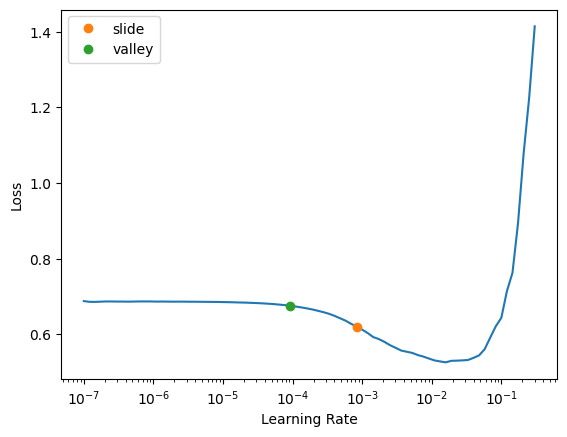

In [32]:
learner.lr_find(suggest_funcs=[slide, valley])

In [33]:
learner.fit_one_cycle(2, 4.7e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.291465,0.261573,0.856649,00:08
1,0.252762,0.250560,0.865729,00:09


In [34]:
learner.save('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-0_v03')

Path('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-0_v03.pth')

In [35]:
learner.export('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-0_v03.pkl')

In [36]:
learner.unfreeze()

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0030199517495930195, valley=1.4454397387453355e-05)

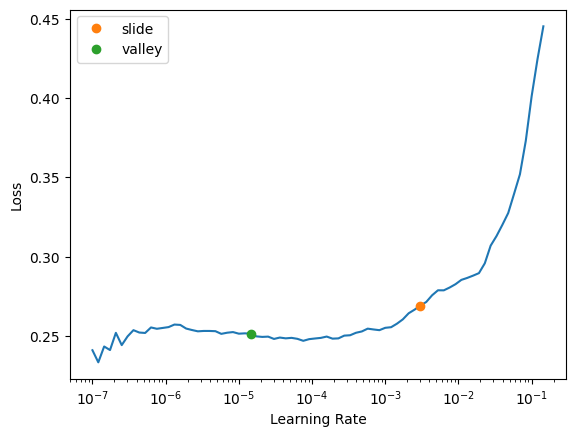

In [37]:
learner.lr_find(suggest_funcs=[slide, valley])

In [38]:
learner.fit_one_cycle(3, slice(4.7e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.264356,0.265489,0.830775,00:17
1,0.236825,0.245685,0.876818,00:19
2,0.201687,0.233792,0.878987,00:16


In [39]:
learner.save('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03')

Path('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03.pth')

In [40]:
learner.export('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03.pkl')

In [41]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_idxs, valid_idxs = splitter(df)

In [42]:
len(train_idxs), len(valid_idxs)

(5900, 655)

In [43]:
valid_df = df.iloc[valid_idxs]
valid_df

,game_title,description,genres,revised_genres,categorical_genres
1212,Heroes of Might and Magic II: The Succession Wars,"A fantasy turn-based strategy game that takes place in the land of Enroth, a place of magic. There is a multitude of creature types, from griffins to rocs, golems to pikemen, unicorns to hydras, and four different dragons. Each castle type has six different creatures, from the we... Read all","['Action', 'Adventure', 'Fantasy']","[Action, Adventure, Fantasy]","[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3608,Scooby-Doo Mystery,A point-and-click style adventure featuring two playable episodes of a typical Scooby-Doo episode.,"['Adventure', 'Comedy', 'Horror', 'Mystery']","[Adventure, Comedy, Horror, Mystery]","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
1177,Dust: A Tale of the Wired West,"First person adventure with action elements set in 1882 about a stranger and card player in Diamondback, New Mexico, who must help the townsfolk and defeat both a dangerous card shark, the Kid, and supernatural Bloodstone.","['Action', 'Adventure', 'Fantasy', 'Mystery', 'Western']","[Action, Adventure, Fantasy, Mystery]","[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,God of War,"After wiping out the gods of Mount Olympus, Kratos moves on to the frigid lands of Scandinavia, where he and his son must embark on an odyssey across a dangerous world of gods and monsters.","['Dark Fantasy', 'Action', 'Adventure', 'Drama', 'Fantasy']","[Dark Fantasy, Action, Adventure, Drama, Fantasy]","[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6171,3 Skulls of the Toltecs,"During the Franco-Mexican War, young cowboy Fenimore Fillmore searches for three golden skulls that hide the location of the lost treasure of the Toltecs. A villainous friar, the French, the Apaches and the Mexicans stand in his way.","['Adventure', 'Animation', 'Comedy', 'War', 'Western']","[Adventure, Animation, Comedy, War]","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...
735,Jak II,"After being tortured and experimented upon in a dystopian city for two years, Jak escapes from prison and joins a rebel group, hoping for answers to his newfound dark powers.","['Buddy Comedy', 'Cyberpunk', 'Dark Comedy', 'Dystopian Sci-Fi', 'Action', 'Adventure', 'Comedy', 'Fantasy', 'Sci-Fi', 'Thriller']","[Action, Adventure, Comedy, Fantasy, Sci-Fi, Thriller]","[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
922,X3: Terran Conflict,Add a plot in your language,['Sci-Fi'],[Sci-Fi],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
5368,Castlevania: Circle of the Moon,"In an alternate 1830, Dracula has been resurrected once again by his minion Camilla. Nathan Graves not only has to stop the lord of darkness but also rescue his master, vampire hunter Morris Baldwin and his fellow apprentice Hugh Baldwin.","['Action', 'Adventure', 'Fantasy', 'Horror']","[Action, Adventure, Fantasy, Horror]","[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
1899,Metal Gear Solid: Snake Eater 3D,An all-new re-interpretation of Metal Gear Solid 3: Snake Eater (2004) on Nintendo 3DS.,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']","[Action, Adventure, Sci-Fi, Thriller]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]"


In [44]:
model_path = '/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03.pkl'

In [45]:
learner_v03 = load_learner(model_path)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [46]:
p = learner_v03.blurr_predict("Eat or be eaten - animals call it survival humans call it business")
p

[(((#0) [],),
  (#1) [tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False])],
  (#1) [tensor([0.3289, 0.3627, 0.0167, 0.0013, 0.3185, 0.0078, 0.0006, 0.0460, 0.0681,
        0.0089, 0.1869, 0.0788, 0.0048, 0.4326, 0.0005, 0.0552, 0.0275, 0.0034,
        0.0023])])]

In [47]:
pr = list(p[0][0][0])
pr

[]

In [48]:
from sklearn import metrics

def metric_measures(test_df, preds):
  targets = [np.asarray(target) for target in test_df['categorical_genres'].to_list()]
  outputs = [np.asarray(pred) for pred in preds]
  #accuracy = metrics.accuracy_score(targets, outputs)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')
  print(f"Accuracy: {accuracy}")
  print(f"F1 Score (Micro): {f1_score_micro}")
  print(f"F1 Score (Macro): {f1_score_macro}")

In [49]:
from tqdm.notebook import tqdm

In [50]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  pred = learner_v03.blurr_predict(row['description'])[0][1][0].numpy()
  preds.append(pred)
preds[0]

  0%|          | 0/655 [00:00<?, ?it/s]

array([ True,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [51]:
len(preds)

655

In [52]:
metric_measures(valid_df, preds)

Accuracy: <function accuracy at 0x7d2f7927b880>
F1 Score (Micro): 0.6716763005780347
F1 Score (Macro): 0.4903564601616921


In [53]:
learner_v03.model.hf_model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
           

In [54]:
classifier = learner_v03.model.hf_model.eval() #evaluation mode

In [55]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 54.5 MB/s eta 0:00:00


In [56]:
torch.onnx.export(
    classifier,
    torch.LongTensor([[0] * 512]),
    '/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03.onnx',
    verbose=True,
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=17,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}
    }
)

/usr/local/lib/python3.11/dist-packages/transformers/modeling_attn_mask_utils.py:196: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  inverted_mask = torch.tensor(1.0, dtype=dtype) - expanded_mask


In [57]:
encoded_valid_genres = {genre : idx for idx, genre in enumerate(valid_genre_list)}
import json

with open('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Encodes/encoded_valid_genres_v03.json', 'w') as f:
  json.dump(encoded_valid_genres, f)

In [58]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00


In [59]:
from onnxruntime.quantization import quantize_dynamic, QuantType

In [60]:
onnx_model_path = '/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03.onnx'
quantize_dynamic(onnx_model_path, '/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/quantized_game_genre_stage-1_v03.onnx', weight_type=QuantType.QUInt8)

In [61]:
import onnxruntime as ort

from transformers import AutoTokenizer
tokenzer = AutoTokenizer.from_pretrained('distilroberta-base')
with open('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Encodes/encoded_valid_genres_v03.json', 'r') as f:
  encoded_valid_genres = json.load(f)
class_labels = encoded_valid_genres.keys()

inf_session = ort.InferenceSession('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/game_genre_stage-1_v03.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [62]:
input_name, output_name

('input_ids', 'output')

In [82]:
class_labels = list(encoded_valid_genres.keys())

In [85]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  input_ids = tokenzer(row['description'])['input_ids'][:512]
  probs = inf_session.run(output_names=[output_name], input_feed={input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)
  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]
  pred_genres = [0] * len(encoded_valid_genres)
  for label in labels:
    pred_genres[encoded_valid_genres[label]] = 1
  preds.append(pred_genres)
preds

  0%|          | 0/655 [00:00<?, ?it/s]

[[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [86]:
metric_measures(valid_df, preds)

Accuracy: <function accuracy at 0x7d2f7927b880>
F1 Score (Micro): 0.6712922810060711
F1 Score (Macro): 0.4921113330566487


In [87]:
quantized_inf_session = ort.InferenceSession('/content/drive/MyDrive/IMDB_game_genre_multi_label_classification/Models/quantized_game_genre_stage-1_v03.onnx')

In [92]:
input, output = quantized_inf_session.get_inputs()[0].name, quantized_inf_session.get_outputs()[0].name
input, output

('input_ids', 'output')

In [108]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  input_ids = tokenzer(row['description'])['input_ids'][:512]
  probs = quantized_inf_session.run(output_names=[output], input_feed={input: [input_ids]})[0][0]
  probs = torch.FloatTensor(probs)
  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks) if mask]
  pred_genres = [0] * len(encoded_valid_genres)
  for label in labels:
    pred_genres[encoded_valid_genres[label]] = 1
  preds.append(pred_genres)
preds

  0%|          | 0/655 [00:00<?, ?it/s]

[[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [110]:
metric_measures(valid_df, preds)

Accuracy: <function accuracy at 0x7d2f7927b880>
F1 Score (Micro): 0.6711059640995947
F1 Score (Macro): 0.4784241852509636
